In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, time, random

from functions_queueing_system import *
from functions_extremum_seeking import *

# Performance over multiple runs

In [2]:
np.random.seed(0)


# theta_bar_init = np.array([np.random.rand(), np.random.rand()/2])
# theta_bar_init = np.array([np.random.rand(), 0])

num_runs = 10
results_all = [None for _ in range(num_runs)]

theta_bar_star = np.array([0.4, 0.2]) #phi_star=0 implies the same problem as before
theta_bar_dim = 2
theta_bar_init_all = np.random.rand(theta_bar_dim, num_runs)
# theta_bar_init_all[1,:] = theta_bar_init_all[1,:]/2 #must be between 0 and 0.5
M = 100
K = 50
T = 200000

alpha = 1
beta = 0.9
w0_bar = np.array([1, 0.7])
gamma_bar = np.array([0.1, 0.1])
theta_bar_limits = [[0, 1], [0, 1]] #to make phi_hat=0 feasible
tau = 100
dep_rate = [0.3, 0.6]
A = 0.1
B = 5


tic= time.perf_counter()
for i in range(num_runs):
    results_all[i] = estimate_theta_es(theta_bar_init_all[:,i], theta_bar_star, theta_bar_dim, M, K, T,\
                      alpha, beta, w0_bar, gamma_bar, theta_bar_limits, tau, \
                      dep_rate, A, B)
    print(f"{i+1} runs done")
toc = time.perf_counter()
print(f"Time taken={toc-tic}s for {num_runs} runs ({(toc-tic)/num_runs}s per run)")

1 runs done
2 runs done
3 runs done
4 runs done
5 runs done
6 runs done
7 runs done
8 runs done
9 runs done
10 runs done
Time taken=1550.3995381999994s for 10 runs (155.03995381999994s per run)


In [3]:
theta_hat_t_all = np.zeros((theta_bar_dim, T, num_runs))
for i in range(num_runs):
    theta_hat_t_all[:,:,i] = results_all[i]['theta_hat_t']

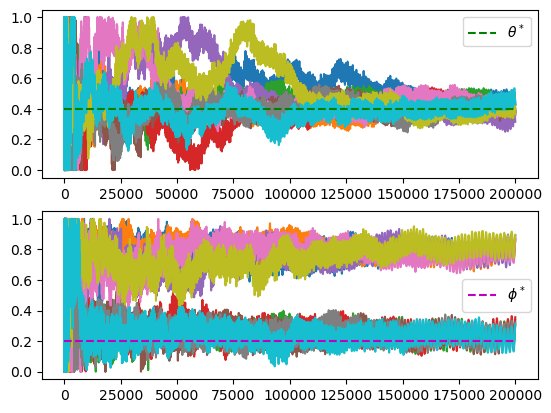

In [4]:
fig, ax = plt.subplots(2, 1)
for i in range(num_runs):
    ax[0].plot(theta_hat_t_all[0,:,i])
    ax[1].plot(theta_hat_t_all[1,:,i])

ax[1].hlines(theta_bar_star[1], 0, T, linestyles='dashed', colors='m', label=r'$\phi^*$')
ax[0].hlines(theta_bar_star[0], 0, T, linestyles='dashed', colors='g', label=r'$\theta^*$')
ax[0].legend()
ax[1].legend()

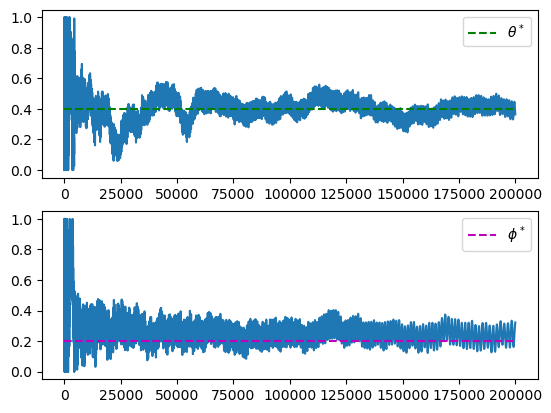

In [19]:
fig, ax = plt.subplots(2, 1)
# for i in range(num_runs):
ind = 7
ax[0].plot(theta_hat_t_all[0,:,ind])
ax[1].plot(theta_hat_t_all[1,:,ind])

ax[1].hlines(theta_bar_star[1], 0, T, linestyles='dashed', colors='m', label=r'$\phi^*$')
ax[0].hlines(theta_bar_star[0], 0, T, linestyles='dashed', colors='g', label=r'$\theta^*$')
ax[0].legend()
ax[1].legend()

Observation: 

the algorithm performs well in some cases (3/10)

it fails to do well when phi-hat sits near 0.5- which makes observations non-informative about the latent state, damaging the theta_estimate too

Potential fix: should I restrict the phi_estimate to (0,0.4)? so that 

In [6]:
theta_bar_pravg_all = np.zeros(theta_hat_t_all.shape)
theta_bar_pravg_all[:,0,:] = theta_hat_t_all[:,0,:]
for t in range(T):
    if t>0:
        theta_bar_pravg_all[:,t,:] = theta_bar_pravg_all[:,t-1,:] + (1/t)*(theta_hat_t_all[:,t,:]-theta_bar_pravg_all[:,t-1,:])

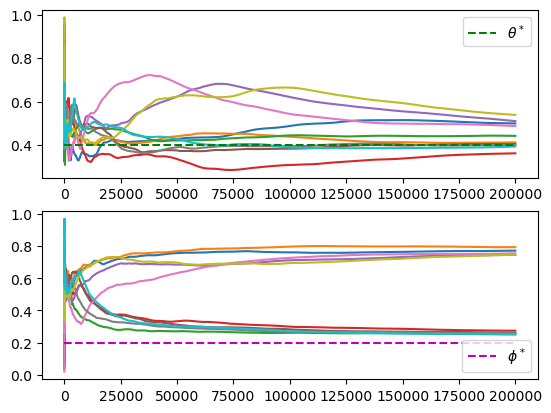

In [7]:
fig, ax = plt.subplots(2, 1)
for i in range(num_runs):
    ax[0].plot(theta_bar_pravg_all[0,:,i])
    ax[1].plot(theta_bar_pravg_all[1,:,i])

ax[1].hlines(theta_bar_star[1], 0, T, linestyles='dashed', colors='m', label=r'$\phi^*$')
ax[0].hlines(theta_bar_star[0], 0, T, linestyles='dashed', colors='g', label=r'$\theta^*$')
ax[0].legend()
ax[1].legend()

In [8]:
np.savez('./results/algo_perf_2param_new.npz', num_runs=num_runs, results_all=results_all, theta_hat_t_all=theta_hat_t_all, \
         theta_bar_pravg_all= theta_bar_pravg_all, theta_bar_star=theta_bar_star, \
         theta_bar_dim=theta_bar_dim, M=M, K=K, T=T, alpha=alpha, beta=beta, w0_bar=w0_bar, gamma_bar=gamma_bar, theta_bar_limits=theta_bar_limits, \
         tau=tau, dep_rate=dep_rate, A=A, B=B)